# Hierarchy Clusting

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading data set
shopping = pd.read_csv("shopping-data.csv")
x = shopping.iloc[:, [0, 1, 2, 3]].values
shopping.info()
shopping[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
#Label encoding categorical data
from sklearn.preprocessing import LabelEncoder

stringCol = shopping.iloc[:,1]
encoder = LabelEncoder()
encoder.fit(stringCol)
encoder.transform(stringCol)

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [5]:
#Replace Genre values with encoded labels
shopping["Genre"].replace(to_replace=shopping["Genre"].tolist(), 
                      value=encoder.transform(stringCol),
                      inplace = True)
shopping.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [6]:
#Frequency distribution of Genre
# Make a crosstab and name the count column
shopping_outcome = pd.crosstab(index=shopping["Genre"], columns="count") 
shopping_outcome

col_0,count
Genre,
0,112
1,88


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

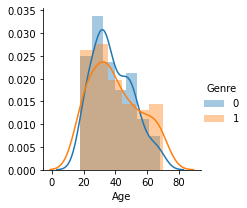

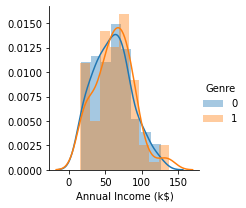

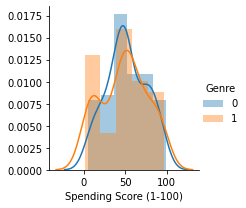

In [7]:
#Histograms of consumer attributes
sns.FacetGrid(shopping,hue="Genre",height=3).map(sns.distplot,"Age").add_legend()
sns.FacetGrid(shopping,hue="Genre",height=3).map(sns.distplot,"Annual Income (k$)").add_legend()
sns.FacetGrid(shopping,hue="Genre",height=3).map(sns.distplot,"Spending Score (1-100)").add_legend()
plt.show()

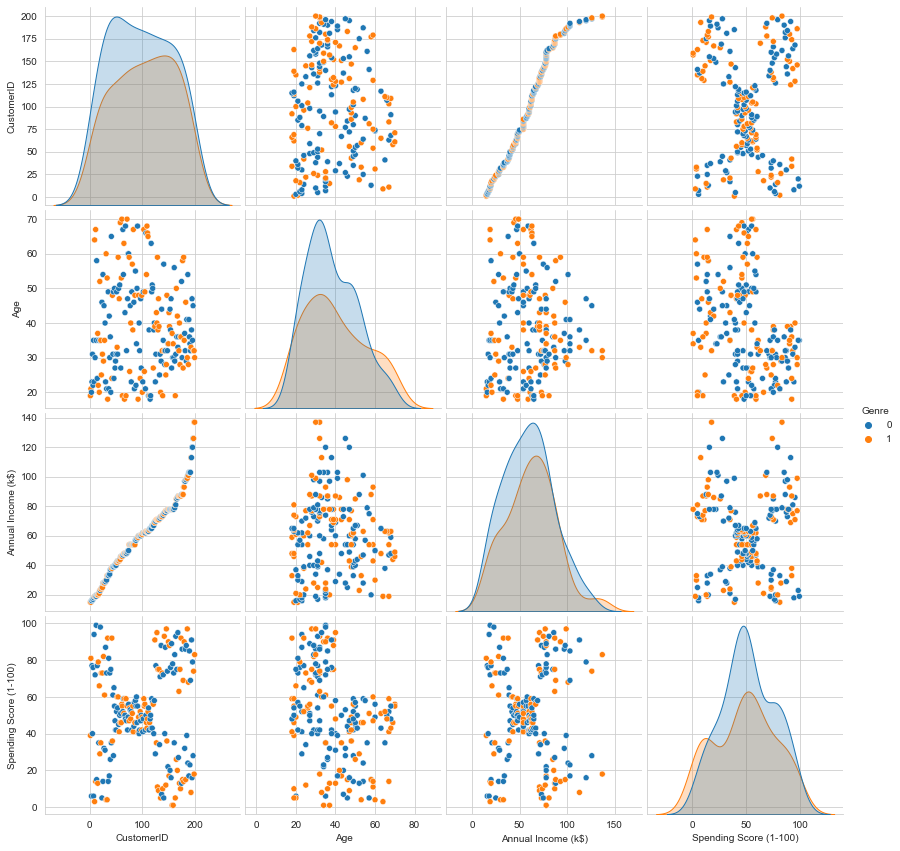

In [8]:
#Visualizing data distribution
#Scatter plot of features according to Genre
sns.set_style("whitegrid")
sns.pairplot(shopping, hue="Genre", height=3);
plt.show()

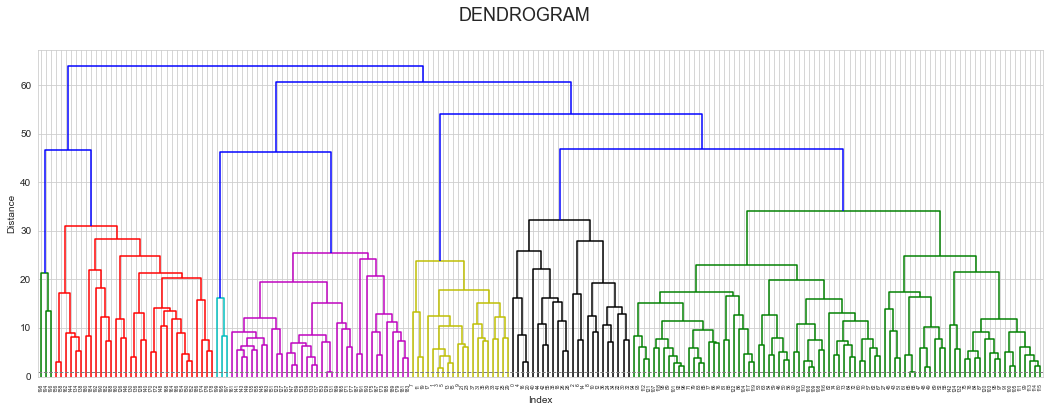

In [23]:
#Draw dendograms
from scipy.cluster.hierarchy import dendrogram, linkage

X = shopping.loc[:,["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Try different types of linkage method
dist_sin = linkage(X, method="average")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM",fontsize=18)

# Add horizontal line at a given distance
plt.axhline(y=1.0, c='grey', lw=1, linestyle='dashed')

plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


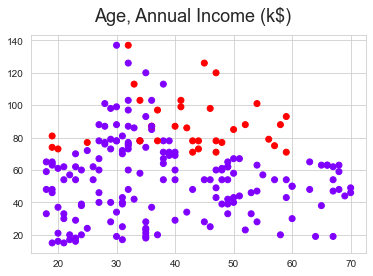

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                  linkage='average')
cluster.fit_predict(X)
print(cluster.labels_)



x = pd.DataFrame(x)
data = x.iloc[:, 2:4].values
plt.scatter(data[:, 0], data[:, 1], c=cluster.labels_, cmap='rainbow')
plt.suptitle("Age, Annual Income (k$)", fontsize=18)
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


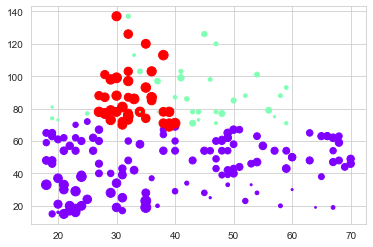

In [17]:
#Apply the HAC algorithm
#Number of clusters : 3
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', 
                                  linkage='average')
cluster.fit_predict(X)
print(cluster.labels_)

#Plot the clusters
#Plot sepal length and sepal width
data = X.iloc[:, 0:3].values
plt.scatter(data[:,0], data[:,1], data[:,2], c=cluster.labels_, cmap='rainbow')
plt.show()


In [18]:
#Evaluation of hierarchical clustering

#Add hierarchical clustering result to data set
from scipy.cluster.hierarchy import fcluster
shopping_HAC = shopping.copy()

#fcluster : forms flat clusters from the hierarchical clustering 
#defined by the given linkage matrix
shopping_HAC['K=2'] = fcluster(dist_sin, 2, criterion='maxclust')
shopping_HAC['K=3'] = fcluster(dist_sin, 3, criterion='maxclust')
shopping_HAC.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),K=2,K=3
0,1,1,19,15,39,1,2
1,2,1,21,15,81,1,2
2,3,0,20,16,6,1,2
3,4,0,23,16,77,1,2
4,5,0,31,17,40,1,2


<AxesSubplot:title={'center':'Genre'}, xlabel='Age', ylabel='Spending Score (1-100)'>

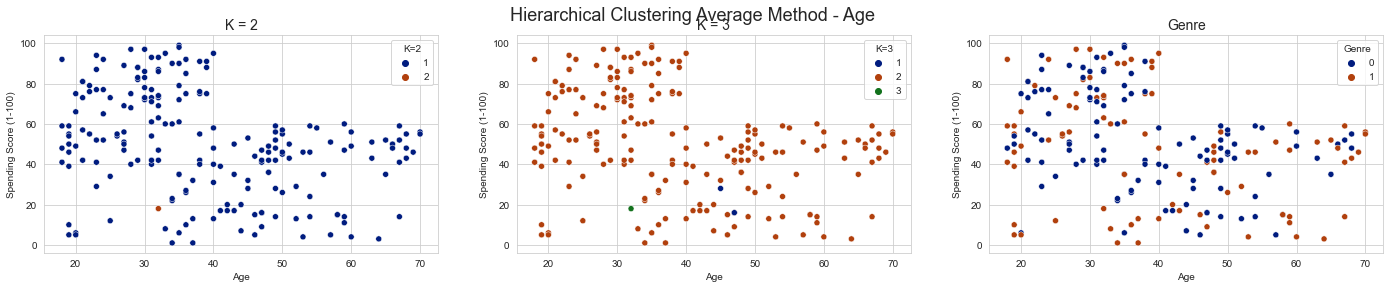

In [20]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering Average Method - Age",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="Age",y="Spending Score (1-100)", data=shopping_HAC, hue="K=2", palette='dark')

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="Age",y="Spending Score (1-100)", data=shopping_HAC, hue="K=3", palette='dark')

plt.subplot(1,3,3)
plt.title("Genre",fontsize=14)
sns.scatterplot(x="Age",y="Spending Score (1-100)", data=shopping_HAC, hue="Genre", palette='dark')